In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ÁõÆÊ†áÂáΩÊï∞ùë¶=ùë†ùëñùëõ2ùúãùë•‚Äî‚ÄîÂú®Âá†‰∏™È¢ëÁéáÂÄº‰∏ãÊµãËØïÔºö1,2,3,9
def real_func(x,freq=2):
    #return np.sin(2*np.pi*x)
    #return np.sin(2*2*np.pi*x)
    return np.sin(freq*2*np.pi*x)
    #return np.sin(8*2*np.pi*x)

# Â§öÈ°πÂºè
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# ÊÆãÂ∑Æ
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

def fitting(freq_label,variance_label,x,y,M=0):
    """
    M    ‰∏∫ Â§öÈ°πÂºèÁöÑÊ¨°Êï∞
    """
    # ÈöèÊú∫ÂàùÂßãÂåñÂ§öÈ°πÂºèÂèÇÊï∞
    import matplotlib.pyplot as plt
    p_init = np.random.rand(M + 1)
    # ÊúÄÂ∞è‰∫å‰πòÊ≥ï
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
#     print('Fitting Parameters:', p_lsq[0])

    # ÂèØËßÜÂåñ
    plt.title("frequence=" + freq_label + " variance=" + variance_label + " M=" + str(M))
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

In [3]:
x = np.linspace(0, 1, 200)
x_points = np.linspace(0, 1, 1000)

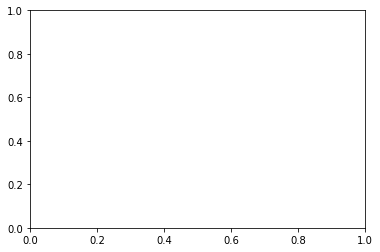

In [4]:
freqs = [1,2,4,8]
variances = [0.1,0.2,0.3,0.5]
M = [10,30,50,180]
for freq in freqs:
    for variance in variances:
        y_ = real_func(x, freq)
        y = [np.random.normal(0, variance) + y1 for y1 in y_]
        for m in M:
            fitting(str(freq),str(variance),x,y,m)
            plt.savefig(fname="./pics/"+"Freq="+str(freq)+" Var="+str(variance)+" M="+str(m)+".png",figsize=[10,10])
            plt.cla()